In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/' , one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [4]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28


In [6]:
X = tf.placeholder(tf.float32 , [None , n_input])

In [8]:
W_encode = tf.Variable(tf.random_normal([n_input , n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode))

In [15]:
W_encode

<tf.Variable 'Variable_2:0' shape=(784, 256) dtype=float32_ref>

In [9]:
W_decode = tf.Variable(tf.random_normal([n_hidden , n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode))

In [11]:
cost = tf.reduce_mean(tf.pow(X-decoder,2))
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [16]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [17]:
total_batch = int(mnist.train.num_examples/batch_size)

In [18]:
for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs , batch_ys = mnist.train.next_batch(batch_size)
        _ , cost_val = sess.run([opt , cost] , feed_dict={X:batch_xs})
        total_cost += cost_val
    print('Epoch : {} \n Avg.Cost = {}'.format(epoch , total_cost/total_batch))

Epoch : 0 
 Avg.Cost = 0.06263346629386599
Epoch : 1 
 Avg.Cost = 0.037920911345969546
Epoch : 2 
 Avg.Cost = 0.03207853476432237
Epoch : 3 
 Avg.Cost = 0.02901740813119845
Epoch : 4 
 Avg.Cost = 0.026968643462116068
Epoch : 5 
 Avg.Cost = 0.026096673231910575
Epoch : 6 
 Avg.Cost = 0.02559440926733342
Epoch : 7 
 Avg.Cost = 0.02468170739371668
Epoch : 8 
 Avg.Cost = 0.02391592272641984
Epoch : 9 
 Avg.Cost = 0.023670956116508355
Epoch : 10 
 Avg.Cost = 0.023474527712572704
Epoch : 11 
 Avg.Cost = 0.023311682590706782
Epoch : 12 
 Avg.Cost = 0.023047560067339375
Epoch : 13 
 Avg.Cost = 0.022881286411800168
Epoch : 14 
 Avg.Cost = 0.022787949774752965
Epoch : 15 
 Avg.Cost = 0.02269723321565173
Epoch : 16 
 Avg.Cost = 0.022630627250129525
Epoch : 17 
 Avg.Cost = 0.02257686276666143
Epoch : 18 
 Avg.Cost = 0.022531712210991164
Epoch : 19 
 Avg.Cost = 0.02248852046037262


In [22]:
n = 4
canvas_orig = np.empty((28*n , 28*n))
canvas_recon = np.empty((28*n , 28*n))
for i in range(n):
    batch_x , _ = mnist.test.next_batch(n)
    g = sess.run(decoder , feed_dict={X:batch_x})
    for j in range(n):
        canvas_orig[i*28:(i+1)*28 , j*28:(j+1)*28] = batch_x[j].reshape([28,28])
    for j in range(n):
        canvas_recon[i*28:(i+1)*28 , j*28:(j+1)*28] = g[j].reshape([28,28])

Origin


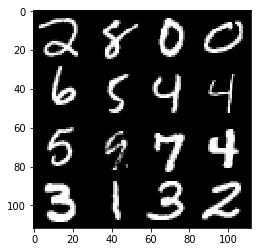

Restructed


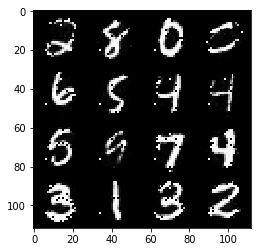

In [23]:
print('Origin')
plt.figure(figsize=(n,n))
plt.imshow(canvas_orig , origin='upper' , cmap='gray')
plt.show()

print('Restructed')
plt.figure(figsize=(n,n))
plt.imshow(canvas_recon , origin='upper' , cmap='gray')
plt.show()